![](/pictures/chart-preview.png)

# Visualizing historical data

> "A quick introduction on how to gather data using Python, Pandas and Pandas_DataReader in order to easily gather historical times from Yahoo Finance. "


## Introduction

To start our data analysis and portfolio construction journey, we will perform the basic - but essential - task of **getting access** to **time series** and plot them using pandas.

> Tip: This article is written as a Jupyter Notebook. It has been published using [Fastpages](https://portfolio-geek.com/blogging/publishing/workflow/2022/03/06/write-articles-with-jupyter-fastpages.html). The Jupyter notebook is available on GitHub and if you want to, you can run it directly using the provided Binder link displayed at the top of the article.


## Load libraries

A key benefit of **Python** is the sheer number of libraries we can leverage to perform a particular task.  Choosing the right library might look a bit overwhelming, and one the goals of this blog is actually to provide the reader my honest view on what makes most sense to perform the usual tasks in my daily work.

The key module for this article is **[yfinance](https://github.com/ranaroussi/yfinance)**, a fantastic data gathering library that you can find [here](https://github.com/ranaroussi/yfinance) on GitHub.

In [1]:
#collapse-hide
from matplotlib import pyplot as plt
import pandas as pd
import yfinance as yf
import datetime as dt

# Note that this change the decimals places inside Jupyter, but not on the website
pd.options.display.float_format = '{:,.1f}'.format

## Get historical data

Let's get ready, and gather some historical data for, say, 4 **Exchange Traded Funds** (ie "ETFs", still commonly referred to as "trackers" in France): 
- SPY: **S&P 500**
- GLD: **Gold**
- AGG: **US Aggregate (US Bonds)**
- CAC.PA: **CAC 40 (French Equity Index)**

You might wonder what the first 3 letters actually correspond to? They are the usual identifier for each ETF on the markets, and are often called the **ticker**of the ETF. 

To gather data, you must *de facto* provide one ticker for each security, but if you forgot the ticker, Google is usually your friend!

We will need define to find a few more **parameters**:
- The 2 variables start_date and end_date to keep some flexibility, 
- The variable *tickers* will store our ticker list, and pass it as a parameter to Yahoo, in order to specify our query.


In [2]:
#collapse-hide

start_date = '2015-01-01'
end_date = '2022-05-14'
tickers = ['SPY', 'GLD', 'AGG', 'CAC.PA']
df = yf.download(tickers,  start=start_date, end=end_date)

# This ones keep the decimals to one on the website. 
# This is especially useful to print dataframes.
df = df.round(decimals=2)



[                       0%                       ]

[**********************50%                       ]  2 of 4 completed

[**********************75%***********            ]  3 of 4 completed

[*********************100%***********************]  4 of 4 completed



## Visual data check

By default, Yahoo Finance provides us with several fields, not all of them will be useful in this introduction, and we will perform some further filtering below.

To quickly check the status of what we now have, note the use of the **tail()** function below.

[Pandas tail() function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html)

In [3]:
df.tail(3)

Adj Close                    Close                     High         \
                 AGG CAC.PA   GLD   SPY   AGG CAC.PA   GLD   SPY   AGG CAC.PA   
Date                                                                            
2022-05-11      95.8   59.1 172.8 379.5 102.8   62.6 172.8 392.8 102.8   62.6   
2022-05-12      96.0   58.5 170.2 379.1 103.0   62.0 170.2 392.3 103.1   62.3   
2022-05-13      95.6   60.0 168.8 388.1 102.5   63.5 168.8 401.7 102.8   63.5   

            ...   Low        Open                          Volume           \
            ...   GLD   SPY   AGG CAC.PA   GLD   SPY          AGG   CAC.PA   
Date        ...                                                              
2022-05-11  ... 172.2 392.0 102.1   61.7 172.5 398.1 16,462,000.0 45,387.0   
2022-05-12  ... 169.9 385.1 102.9   61.4 172.1 389.4  9,015,300.0 62,497.0   
2022-05-13  ... 168.0 395.6 102.8   62.4 168.3 396.7  6,715,600.0 77,603.0   

                                       
                    GLD           SPY  
Date                                   
2022-05-11  9,179,600.0 142,361,000.0  
2022-05-12 11,626,800.0 125,090,800.0  
2022-05-13 13,031,100.0 104,174,400.0  

[3 rows x 24 columns]

The **Adjusted Close** field is returned by Yahoo Finance and is exactly what we are looking for.

Adjusted Close corresponds to the time series containing what we usually call the *total return*, typically **compounding the dividends** with the **price returns**. 

This reflects the total return delivered by the ETF, should the investor reinvest systematically the dividend paid by the ETF by buying more this ETF. This is probably the most useful field when we aim to assess the **long term returns of an asset class**.

To quickly check the status of what we now have, note the use of the **tail()** function below, which get the last *n* rows of the dataset. Combined with Jupyter's power in printing data, it's probably the fastest way to navigate and check a particular dataset.

[Pandas tail() function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html)

In [4]:
df['Adj Close'].tail(3)

,AGG,CAC.PA,GLD,SPY
Date,,,,
2022-05-11,95.8,59.1,172.8,379.5
2022-05-12,96.0,58.5,170.2,379.1
2022-05-13,95.6,60.0,168.8,388.1


## Plot the raw time series using the seaborn library

To quickly check that we got the right data, let's visualise it.

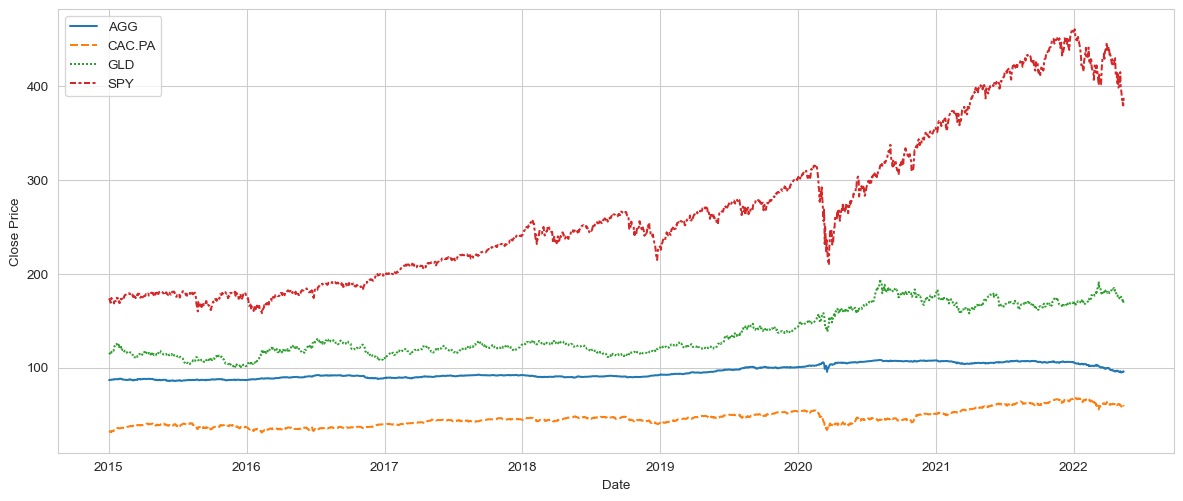

In [5]:
#collapse-hide
import seaborn as sns

# Apply the default theme
sns.set_style('whitegrid')

plt.figure(figsize=(15,6))
p = sns.lineplot(data=df['Adj Close'])
p.set_ylabel("Close Price")
pass

## Plot the normalised the time series

The chart above is useful, but the vast difference between the ETFs' values makes it a bit hard to actually track each respective time series. 

It would be more effective to **normalise the data**. It's often referred to as "rebasing", ie making each time series starting at 100, this will make it much easier to compare.

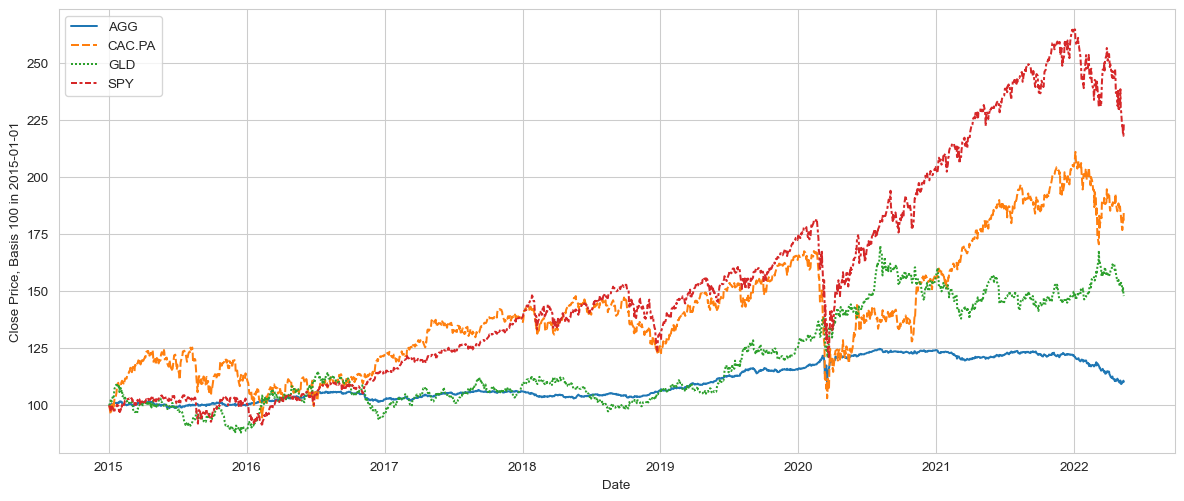

In [6]:
#collapse-hide

# Normalise the data, which here means for each column to start at 100, with subsequent price development "scaled" according to daily returns
normalised_ts = (df['Adj Close']/df['Adj Close'].iloc[0, ]*100)
plt.figure(figsize=(15,6))
p = sns.lineplot(data=normalised_ts)
p.set_ylabel(f"Close Price, Basis 100 in {start_date}")
pass

## Rolling window cumulated returns

It's often easy to get 'seduced' by the compelling long term returns, especially about Equities. And indeed, it was a good thing to be invested in Equities in the long run !

But 1y returns are usually a good way to keep track of the portfolio, and moreover to see how these returns have developed over time. With a 1y return chart, the notion of risk, ie either fast-changing returns, or - even worse - consistently negative returns, quickly becomes apparent.

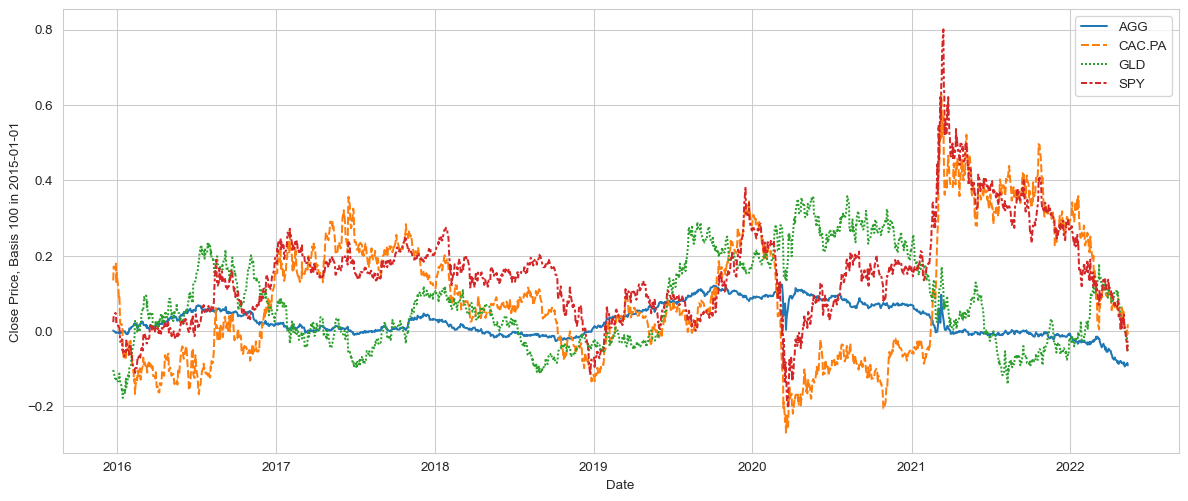

In [7]:
# We use pct_change() to calculate the one year return
ts_1y_returns = df['Adj Close'].pct_change(periods=252)
plt.figure(figsize=(15,6))
p = sns.lineplot(data=ts_1y_returns)
p.set_ylabel(f"Close Price, Basis 100 in {start_date}")
pass

## Smoother returns

The chart above is great, but a bit too busy for my taste. Whilst accurate, there is too much info going on, the noise might reduce our ability to spot real medium terms or breakouts. 

This is where **pandas** starts to be really powerful. The *rolling()* function essentially captures sub-series, with a defined length (here 21 days). By *chaining* the results of rolling() with the *mean* function, ie calculating the arithmetic average, this will provide us in a one-liner with a new series. This generated dataframe contains the time series of the moving average (21 days) for each of our time series.

Whilst this "chaining" approach might initially sound obscure, this is **extremely powerful**, especially when factoring in the fact that you just need to change the tickers of the ETFs in the beginning of the article to entirely update the whole analysis ... your turn!

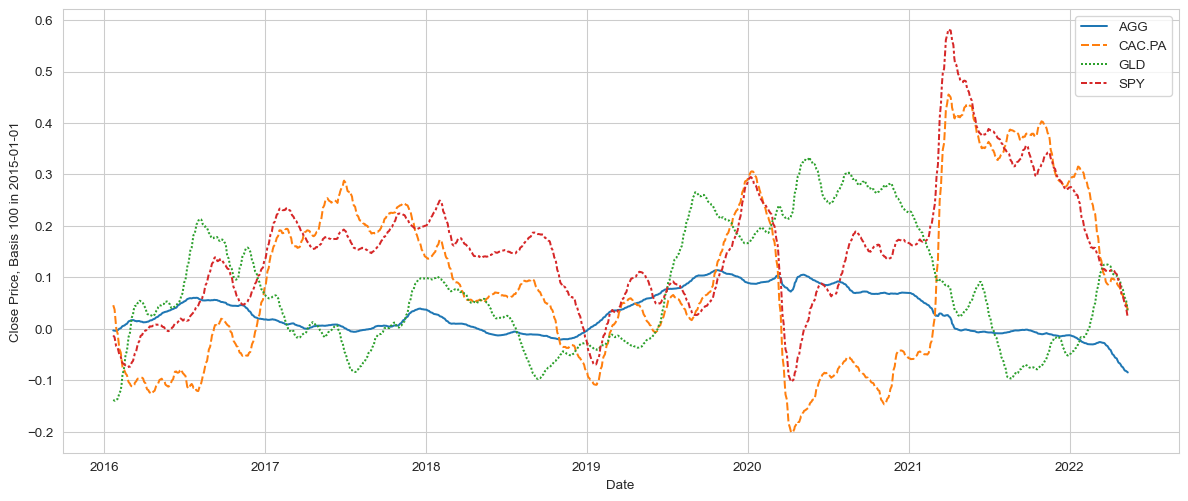

In [8]:
# Normalise the data, which here means for each column to start at 100, with subsequent price development "scaled" according to daily returns
ts_1y_returns = df['Adj Close'].pct_change(periods=252).rolling(window=21).mean()
plt.figure(figsize=(15,6))
p = sns.lineplot(data=ts_1y_returns)
p.set_ylabel(f"Close Price, Basis 100 in {start_date}")
pass

## Conclusion

So that's it for this short intro on data gathering and visualising. In this article, we have gathered, checked, normalised and plot close prices for different ETFs. 

The next step will be to use these function to generate some returns and risk statistics, and start exploring portfolio construction.

See you in the next article, and stay safe.


## Useful Related Links

{% series_list %}

There is no such thing as "full tutorial on something", **knowledge is everywhere**. I found these tutorials pretty handy, check them out too!

- [Seaborn Tutorial](http://seaborn.pydata.org/introduction.html#:~:text=Seaborn%20is%20a%20library%20for,explore%20and%20understand%20your%20data.)
- [Tutorial on F-Strings](https://www.datacamp.com/community/tutorials/f-string-formatting-in-python)
